### Task 1- Prediction using Supervised ML (Using Simple Linear regression)
  <i>- Sawan Shivanand beli</i>

### Problem Statement

Given the data set: http://bit.ly/w-data  
Predict the percentage of a student based on the no. of study hours.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [2]:
link= "http://bit.ly/w-data"
scores_df=pd.read_csv(link)
scores_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Visualization

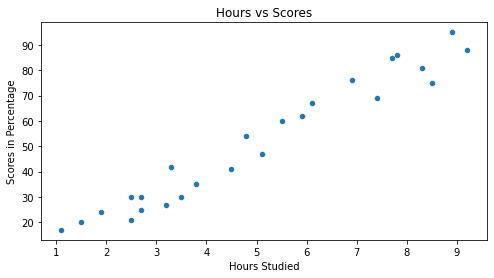

In [3]:
# Plotting the distribution of scores
scores_df.plot(x='Hours', y='Scores', kind='scatter')
plt.gcf().set_size_inches(8,4)
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel( 'Scores in Percentage')  
plt.show()

#### Observation(s):
- There is a clear positive linear relationship between the No. of Hours the student has studied and the scores(in pencentage) he/she has scored. Hence, students who study more (in terms of hours) tend to score higher numbers.

### Data Preparation 

In [4]:
#Keeping all the independent variables in X and putting the target variables in y
X = scores_df.iloc[:, :-1]
y = scores_df.iloc[:,1]

#### Splitting the data into test and train set using the sckit.learn's train_test_split( )

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=100) 

#### Now training the algorithm

In [6]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

#### Fitting the trained line through the scatter plot

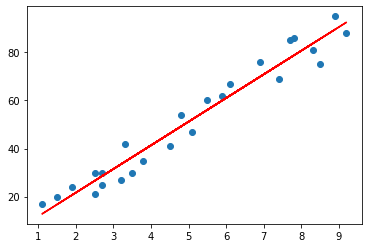

In [7]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

### Predictions

In [8]:
y_pred = lr.predict(X_test) # Predicting the scores

In [9]:
df_1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_1

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


Now that the model is ready and can predict the marks scored by the student when the no. of study hours is given, you can test it on your own data

Let's say we wanted to know the score of a student who has studied 9.25 hrs/day

In [10]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.96728365185982


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.140342096254413
